Loading CSV

In [ ]:
import pandas as pd
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Balen_English_final.csv')

In [ ]:
df

,video_id,author,published_at,like_count,text,time_period,script
0,5XkszPOC2Dg,@truthisbitter1780,2022-05-16 03:37:58,0.0,I also love Harley and joker,before_election,English
1,UQBWAuoppkw,@dipendrasingh5540,2022-04-30 06:26:28,5.0,This is going to be the one of the most viewed...,before_election,English
2,UQBWAuoppkw,@mrlassun21,2022-05-11 05:02:40,1.0,"After watching this video, I realized Sanjay ...",before_election,English
3,YRNXYk7Jd1s,@aaite_Magar,2022-04-20 16:04:02,1.0,Congratulation of all,before_election,English
4,YRNXYk7Jd1s,@manojsah8156,2022-04-22 07:21:38,0.0,Great balen sir,before_election,English
...,...,...,...,...,...,...,...
1027,L9WRdb29wXw,@indrag.m5567,2023-09-19 15:53:21,0.0,The content is almost similar to video uploade...,after_election,English
1028,obpm6xiuh6U,@musiccreator681,2023-07-05 21:42:17,0.0,"Viten fight <br><a href=""https://www.youtube.c...",after_election,English
1029,CkDQAjyTOaY,@rameshthapa5068,2024-05-29 16:30:35,1.0,Proud of you ❤,after_election,English
1030,UQBWAuoppkw,@anjukz2059,2023-05-31 06:58:16,0.0,31.03.23 still watching ♥️♥️🙏,after_election,English


PREPROCESSING USING NLP

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (if not already downloaded)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenize the text
    tokens = text.split()

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join the tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply the preprocessing function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)


In [ ]:
df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
0,5XkszPOC2Dg,@truthisbitter1780,2022-05-16 03:37:58,0.0,I also love Harley and joker,before_election,English,also love harley joker
1,UQBWAuoppkw,@dipendrasingh5540,2022-04-30 06:26:28,5.0,This is going to be the one of the most viewed...,before_election,English,going one viewed podcast ever proved good
2,UQBWAuoppkw,@mrlassun21,2022-05-11 05:02:40,1.0,"After watching this video, I realized Sanjay ...",before_election,English,watching video realized sanjay soo dumb cant a...
3,YRNXYk7Jd1s,@aaite_Magar,2022-04-20 16:04:02,1.0,Congratulation of all,before_election,English,congratulation
4,YRNXYk7Jd1s,@manojsah8156,2022-04-22 07:21:38,0.0,Great balen sir,before_election,English,great balen sir
...,...,...,...,...,...,...,...,...
1027,L9WRdb29wXw,@indrag.m5567,2023-09-19 15:53:21,0.0,The content is almost similar to video uploade...,after_election,English,content almost similar video uploaded quotwhy ...
1028,obpm6xiuh6U,@musiccreator681,2023-07-05 21:42:17,0.0,"Viten fight <br><a href=""https://www.youtube.c...",after_election,English,viten fight bra hrefhttpswwwyoutubecomwatchvia...
1029,CkDQAjyTOaY,@rameshthapa5068,2024-05-29 16:30:35,1.0,Proud of you ❤,after_election,English,proud
1030,UQBWAuoppkw,@anjukz2059,2023-05-31 06:58:16,0.0,31.03.23 still watching ♥️♥️🙏,after_election,English,still watching


CREATE SEPARATE DATAFRAME FOR BEFORE AND AFTER ELECTION

In [ ]:
# Create two separate dataframes based on the 'time_period' column
before_election_df = df[df['time_period'] == 'before_election']
after_election_df = df[df['time_period'] == 'after_election']

In [ ]:
before_election_df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
0,5XkszPOC2Dg,@truthisbitter1780,2022-05-16 03:37:58,0.0,I also love Harley and joker,before_election,English,also love harley joker
1,UQBWAuoppkw,@dipendrasingh5540,2022-04-30 06:26:28,5.0,This is going to be the one of the most viewed...,before_election,English,going one viewed podcast ever proved good
2,UQBWAuoppkw,@mrlassun21,2022-05-11 05:02:40,1.0,"After watching this video, I realized Sanjay ...",before_election,English,watching video realized sanjay soo dumb cant a...
3,YRNXYk7Jd1s,@aaite_Magar,2022-04-20 16:04:02,1.0,Congratulation of all,before_election,English,congratulation
4,YRNXYk7Jd1s,@manojsah8156,2022-04-22 07:21:38,0.0,Great balen sir,before_election,English,great balen sir
...,...,...,...,...,...,...,...,...
520,YRNXYk7Jd1s,@Gojo_Nanami,2022-04-19 03:43:22,0.0,Entry ma sound gayeb 😥,before_election,English,entry sound gayeb
521,UQBWAuoppkw,@Happykat-l7w,2022-05-07 01:39:35,0.0,We need this man,before_election,English,need man
522,-WS50u_kjFw,@Nanimaya2222,2022-05-26 17:53:49,0.0,Yay Hurrah 😃 He won 🥇💕💕💕💕💕. Winner All the Bes...,before_election,English,yay hurrah winner best mayor balen
523,UQBWAuoppkw,@tisashrestha1640,2022-05-02 04:32:56,2.0,"If not now , then never . Dai le jitnu bhayena...",before_election,English,never dai le jitnu bhayena bhane right complai...


In [ ]:
after_election_df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
525,L9WRdb29wXw,@ishanath2023,2023-12-07 05:35:40,0.0,Yo Egoistic ambitious neta ( neta sab layta ) ...,after_election,English,yo egoistic ambitious neta neta sab layta ho n...
526,Ir-SAvHLt1E,@Callingtravel,2023-06-16 23:23:15,0.0,You can prove your self 😮,after_election,English,prove self
527,Ir-SAvHLt1E,@UjwalsilwalUjwal,2023-08-10 16:32:37,0.0,One of the best performance by Mr balen ❤❤❤,after_election,English,one best performance mr balen
528,Ir-SAvHLt1E,@Youtubesundar,2023-06-28 20:31:20,0.0,Thank you balen to make us proud again and aga...,after_election,English,thank balen make u proud supporter
529,Ir-SAvHLt1E,@sagunshrestha4740,2024-04-03 15:53:08,0.0,I love Balen shah... He is our hero.... Role m...,after_election,English,love balen shah hero role modelplz support balen
...,...,...,...,...,...,...,...,...
1027,L9WRdb29wXw,@indrag.m5567,2023-09-19 15:53:21,0.0,The content is almost similar to video uploade...,after_election,English,content almost similar video uploaded quotwhy ...
1028,obpm6xiuh6U,@musiccreator681,2023-07-05 21:42:17,0.0,"Viten fight <br><a href=""https://www.youtube.c...",after_election,English,viten fight bra hrefhttpswwwyoutubecomwatchvia...
1029,CkDQAjyTOaY,@rameshthapa5068,2024-05-29 16:30:35,1.0,Proud of you ❤,after_election,English,proud
1030,UQBWAuoppkw,@anjukz2059,2023-05-31 06:58:16,0.0,31.03.23 still watching ♥️♥️🙏,after_election,English,still watching


DROPPING UNUSEFUL FEATURES

In [ ]:
# Drop the specified columns from the dataframe
before_election_df = before_election_df.drop(columns=['video_id', 'text', 'time_period', 'script'])
after_election_df = after_election_df.drop(columns=['video_id', 'text', 'time_period', 'script'])
# Display the updated dataframe (optional)
# print(before_election_df.head())


In [ ]:
before_election_df

,author,published_at,like_count,processed_text
0,@truthisbitter1780,2022-05-16 03:37:58,0.0,also love harley joker
1,@dipendrasingh5540,2022-04-30 06:26:28,5.0,going one viewed podcast ever proved good
2,@mrlassun21,2022-05-11 05:02:40,1.0,watching video realized sanjay soo dumb cant a...
3,@aaite_Magar,2022-04-20 16:04:02,1.0,congratulation
4,@manojsah8156,2022-04-22 07:21:38,0.0,great balen sir
...,...,...,...,...
520,@Gojo_Nanami,2022-04-19 03:43:22,0.0,entry sound gayeb
521,@Happykat-l7w,2022-05-07 01:39:35,0.0,need man
522,@Nanimaya2222,2022-05-26 17:53:49,0.0,yay hurrah winner best mayor balen
523,@tisashrestha1640,2022-05-02 04:32:56,2.0,never dai le jitnu bhayena bhane right complai...


In [ ]:
after_election_df

,author,published_at,like_count,processed_text
525,@ishanath2023,2023-12-07 05:35:40,0.0,yo egoistic ambitious neta neta sab layta ho n...
526,@Callingtravel,2023-06-16 23:23:15,0.0,prove self
527,@UjwalsilwalUjwal,2023-08-10 16:32:37,0.0,one best performance mr balen
528,@Youtubesundar,2023-06-28 20:31:20,0.0,thank balen make u proud supporter
529,@sagunshrestha4740,2024-04-03 15:53:08,0.0,love balen shah hero role modelplz support balen
...,...,...,...,...
1027,@indrag.m5567,2023-09-19 15:53:21,0.0,content almost similar video uploaded quotwhy ...
1028,@musiccreator681,2023-07-05 21:42:17,0.0,viten fight bra hrefhttpswwwyoutubecomwatchvia...
1029,@rameshthapa5068,2024-05-29 16:30:35,1.0,proud
1030,@anjukz2059,2023-05-31 06:58:16,0.0,still watching


WORD CLOUD

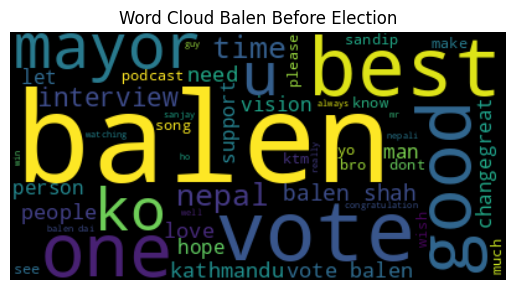

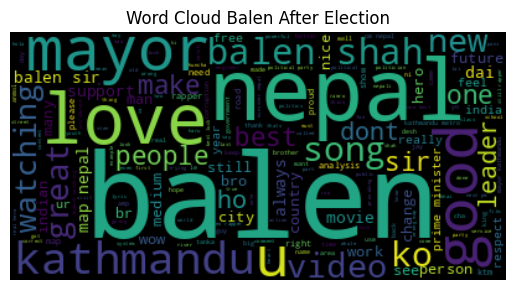

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed texts before the election
text_before = " ".join(before_election_df['processed_text'].astype(str))

# Combine all processed texts after the election
text_after = " ".join(after_election_df['processed_text'].astype(str))


# Create and generate a word cloud image:
wordcloud_before = WordCloud().generate(text_before)

# Display the generated image:
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Balen Before Election")
plt.show()


# Create and generate a word cloud image:
wordcloud_after = WordCloud().generate(text_after)

# Display the generated image:
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Balen After Election")
plt.show()

TOP WORDS

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# ... (Your existing code for loading data and preprocessing) ...

# Combine all processed texts before the election
text_before = " ".join(before_election_df['processed_text'].astype(str))

# Combine all processed texts after the election
text_after = " ".join(after_election_df['processed_text'].astype(str))

def get_top_n_words(text, n=10):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

top_words_before = get_top_n_words(text_before, 8)
top_words_after = get_top_n_words(text_after, 8)

print("Top 20 words before election:")
for word, count in top_words_before:
    print(f"{word}: {count}")

print("\nTop 20 words after election:")
for word, count in top_words_after:
    print(f"{word}: {count}")

Top 20 words before election:
balen: 193
vote: 68
mayor: 49
best: 48
good: 37
shah: 32
one: 31
kathmandu: 29

Top 20 words after election:
balen: 202
nepal: 104
kathmandu: 48
love: 44
mayor: 44
sir: 38
best: 36
shah: 35


distilbert-base-uncased-finetuned-sst-2-english model for sentiment analysis

In [ ]:
# https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to apply sentiment analysis to a text
def analyze_sentiment(text):
    try:
        result = classifier(text)[0]
        return result['label'], result['score']
    except Exception as e:
        print(f"Error analyzing sentiment for text: {text}. Error: {e}")
        return "ERROR", 0.0  # Return a default value in case of an error

# Apply sentiment analysis to the 'processed_text' column
before_election_df[['sentiment_label', 'sentiment_score']] = before_election_df['processed_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))
after_election_df[['sentiment_label', 'sentiment_score']] = after_election_df['processed_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


emotion-english-distilroberta-base model for emotion detection

In [ ]:
#  https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

from transformers import pipeline

# Load the emotion detection model
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Function to detect emotions in a text
def detect_emotion(text):
    try:
        result = classifier(text)
        return result[0]['label']  # Return the predicted emotion label
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

# Apply the emotion detection model to the 'processed_text' column
before_election_df['detected_emotion'] = before_election_df['processed_text'].apply(detect_emotion)
after_election_df['detected_emotion'] = after_election_df['processed_text'].apply(detect_emotion)

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


Sentiment Counts

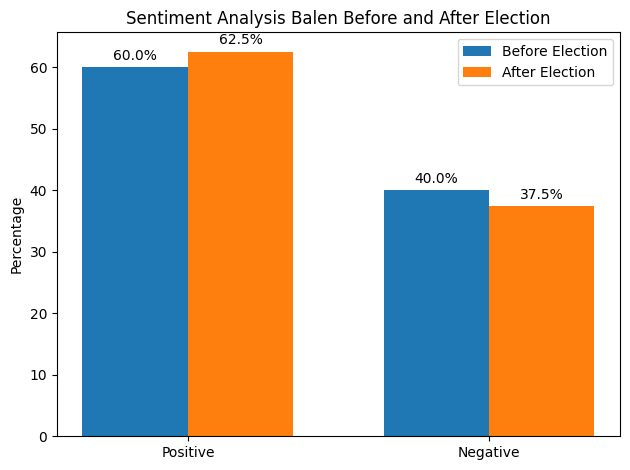

In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment percentages before and after the election
before_positive = before_election_df[before_election_df['sentiment_label'] == 'POSITIVE'].shape[0]
before_negative = before_election_df[before_election_df['sentiment_label'] == 'NEGATIVE'].shape[0]
before_total = before_election_df.shape[0]

after_positive = after_election_df[after_election_df['sentiment_label'] == 'POSITIVE'].shape[0]
after_negative = after_election_df[after_election_df['sentiment_label'] == 'NEGATIVE'].shape[0]
after_total = after_election_df.shape[0]


before_positive_percent = (before_positive / before_total) * 100 if before_total else 0
before_negative_percent = (before_negative / before_total) * 100 if before_total else 0
after_positive_percent = (after_positive / after_total) * 100 if after_total else 0
after_negative_percent = (after_negative / after_total) * 100 if after_total else 0


# Create the chart
labels = ['Positive', 'Negative']
before_percentages = [before_positive_percent, before_negative_percent]
after_percentages = [after_positive_percent, after_negative_percent]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], before_percentages, width, label='Before Election')
rects2 = ax.bar([i + width/2 for i in x], after_percentages, width, label='After Election')

ax.set_ylabel('Percentage')
ax.set_title('Sentiment Analysis Balen Before and After Election')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add percentage labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

EMOTION COUNT

In [ ]:
# Group the DataFrame by 'detected_emotion' and count the occurrences of each emotion.
emotion_counts = before_election_df.groupby('detected_emotion').size()

# Display the emotion counts.
emotion_counts

,0
detected_emotion,
anger,20
disgust,3
fear,8
joy,141
neutral,286
sadness,30
surprise,37


In [ ]:
emotion_countss=after_election_df.groupby('detected_emotion').size()
emotion_countss

,0
detected_emotion,
anger,24
disgust,3
fear,3
joy,133
neutral,271
sadness,38
surprise,35


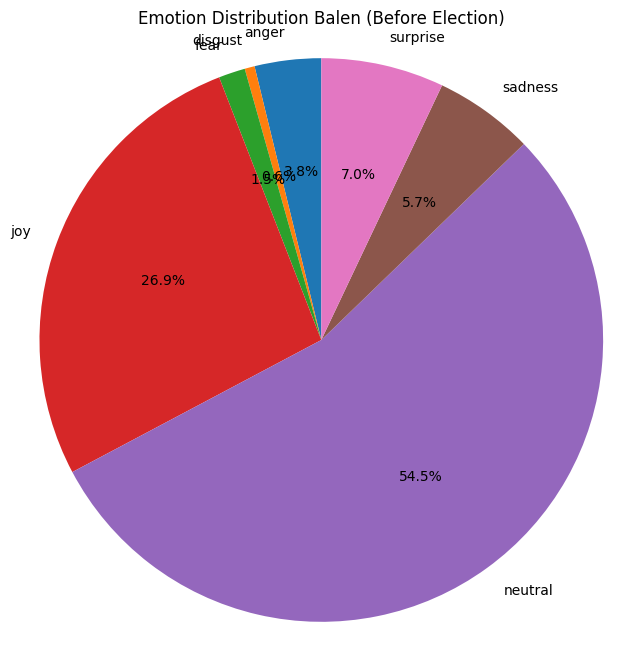

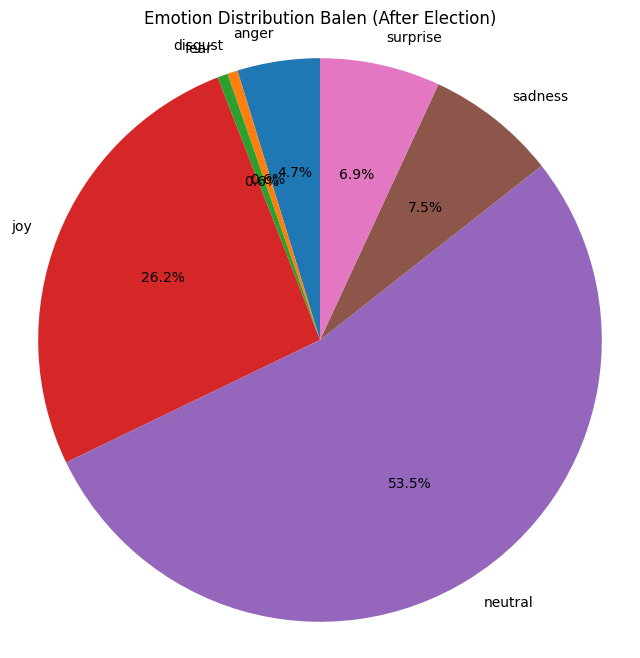

In [ ]:
import matplotlib.pyplot as plt

# Create the pie chart for before election
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution Balen (Before Election)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create the pie chart for after election
plt.figure(figsize=(8, 8))
plt.pie(emotion_countss, labels=emotion_countss.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution Balen (After Election)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()